## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

## Load data

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:,0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:,0]

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
## Your code HERE
mv1 = x_train[y_train == 0]
mv2 = x_train[y_train == 1]
N1 = len(mv1)
N2 = len(mv2)
m1 = np.mean(mv1, axis=0)
m2 = np.mean(mv2, axis=0)

In [5]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [2.47107265 1.97913899] mean vector of class 2: [1.82380675 3.03051876]


## 2. Compute the Within-class scatter matrix SW

In [6]:
## Your code HERE
# mv1.shape = (379, 2), mv2.shape = (371, 2), so we have to transpose each matrix(rowvar=False)
sw = np.cov(mv1, rowvar=False) + np.cov(mv2, rowvar=False)

In [7]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 0.37548675 -0.01411612]
 [-0.01411612  0.36914756]]


## 3.  Compute the Between-class scatter matrix SB

In [8]:
## Your code HERE
diff_mv = np.zeros((2,1))
diff_mv[0][0], diff_mv[1][0] = m2[0]-m1[0], m2[1]-m1[1]
sb = diff_mv * diff_mv.T

In [9]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [10]:
## Your code HERE
w = np.zeros((2,1))
_w = np.linalg.solve(sw, m2-m1)
_w /= np.linalg.norm(_w)
w[0][0], w[1][0] = _w[0], _w[1]

In [11]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.50242705]
 [ 0.8646196 ]]


In [12]:
# prediction time, using knn to optimize w
k = 11 # kNN's k
def predict(sample_x, y_train, data, k=3):
    _kNN = KNeighborsClassifier(n_neighbors=k)
    _kNN.fit(sample_x, y_train)
    pred = _kNN.predict(data)
    return pred

sample = np.dot(x_train, w)
x_data = np.dot(x_test, w)
y_pred = predict(sample, y_train, x_data, k)

## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score 
you can use accuracy_score function from sklearn.metric.accuracy_score

In [13]:
acc = accuracy_score(y_test, y_pred)

In [14]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.912


## 6. Plot the 1) projection line 2) Decision boundary and colorize the data with each class
### the result should look like this [image](https://i2.kknews.cc/SIG=fe79fb/26q1000on37o7874879n.jpg) (Red line: projection line, Green line: Decision boundary)

In [19]:
# projection handling
def project(data, w, color):
    # the line is: ax + by + c = 0, w.T = (-a, b)
    a, b = w[1][0], -w[0][0]
    for x, y in data:
        x_p = x - a*(a*x + b*y - 2*b)/(a**2 + b**2)
        y_p = y - b*(a*x + b*y - 2*b)/(a**2 + b**2)
        plt.plot([x, x_p], [y, y_p], c='lightgreen', linestyle='--')
        plt.scatter(x_p, y_p, c=color)

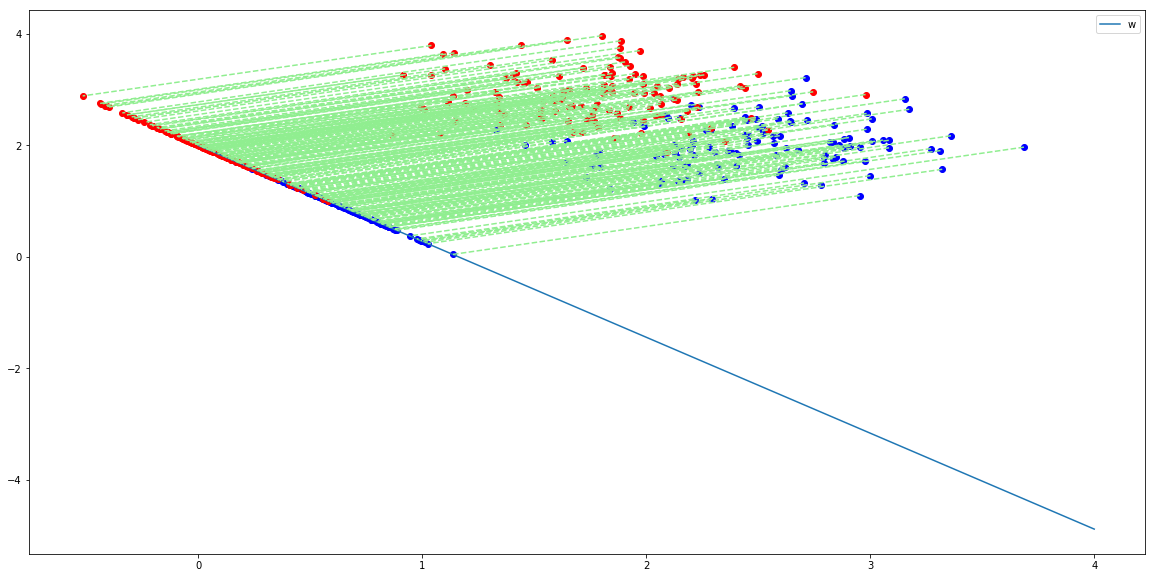

In [27]:
slope = w[1][0]/w[0][0]
plt.figure(figsize=(20, 10))
#plt.axis('equal')

# x_test point display
c1 = x_test[y_test == 0]
c2 = x_test[y_test == 1]
plt.scatter(c1[:,0], c1[:,1], c='blue')
plt.scatter(c2[:,0], c2[:,1], c='red')

# projection(w) line drawing
center = (np.mean(c1, axis=0) + np.mean(c2, axis=0))/2
x = np.linspace(0, 4, 10)
y = slope*x + 2
plt.plot(x, y, linestyle='-', label='w')

# project all the sample points on the w line
project(c1, w, 'blue')
project(c2, w, 'red')

plt.legend(loc='best')